In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.color_palette("tab10")

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [112]:
df = pd.read_csv("final_results.csv")
df.loc[((df['Method'] == "Reweighing") & (df['Another_Info'] == "No Reweighing")), 'Method'] = "BaseRL"
ordem_desejada = ["BaseRL", "Reweighing", "DisparactImpactRemover", "Optimizer", "PrejudiceRemover" , "RejectClass"]

# Ordenando o dataset de acordo com a coluna e a ordem desejada
df = df.sort_values(by="Method", key=lambda x: x.map(ordem_desejada.index))

# Imprimindo o dataset ordenado


<Axes: xlabel='Method', ylabel='F1-Score'>

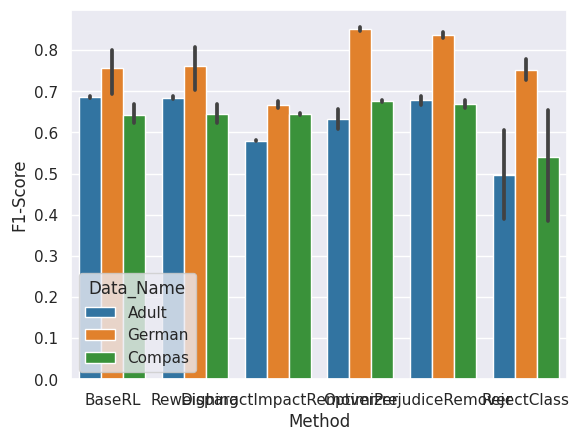

In [113]:
sns.barplot(df, x = "Method", y = "F1-Score", hue = "Data_Name" ,palette='tab10')

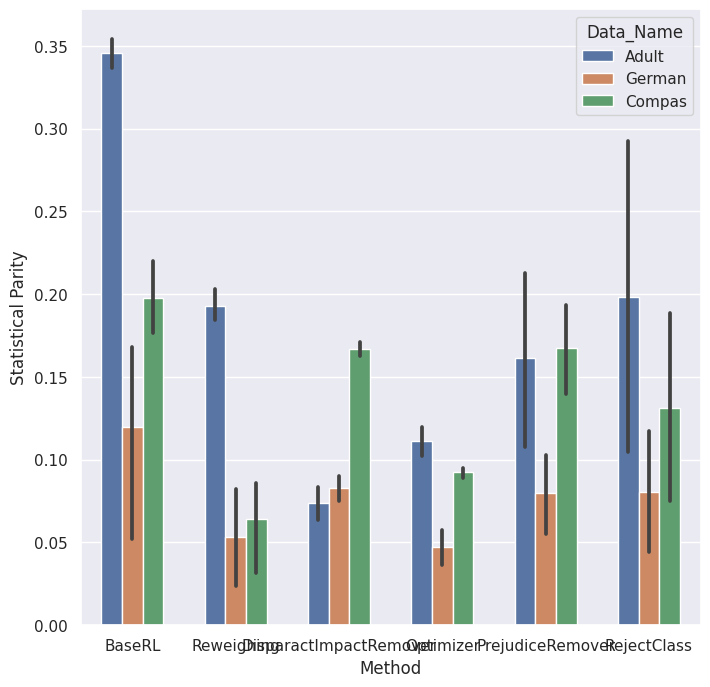

In [115]:
df["Statistical Parity"] = df["Statistical Parity"].apply(abs)
sns.set(style="darkgrid")
plt.figure(figsize=(8, 8))
sns.barplot(df, x = "Method", y = "Statistical Parity", hue = "Data_Name" , width=0.6)
plt.show()

<Figure size 900x800 with 0 Axes>

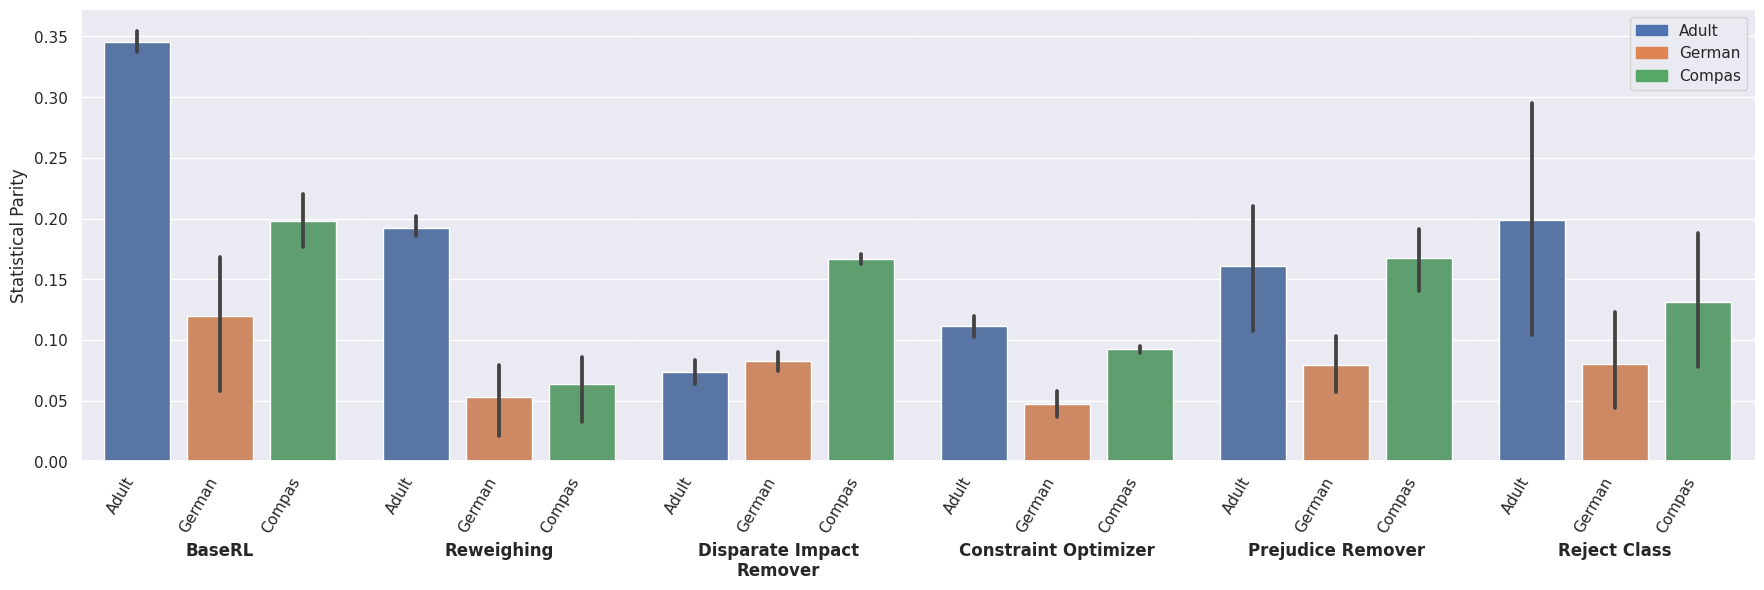

In [148]:
method_names = ["BaseRL","Reweighing", "Disparate Impact\nRemover", "Constraint Optimizer", "Prejudice Remover", "Reject Class"]
data_names = ["Adult", "German", "Compas"]
# Falta selecionar o best of Disparate Impact, Constraint Optimize e Prejudice Remover
# Também falta separar o Reweighing in NO reweighin e with reweighing

colors = sns.color_palette("deep", len(data_names))

df["Statistical Parity"] = df["Statistical Parity"].apply(abs)
sns.set(style="darkgrid")
plt.figure(figsize=(9, 8))
g = sns.catplot(
    data=df, x="Data_Name", y="Statistical Parity", col="Method",
    kind="bar", height=6, aspect=0.5
)
for ax in g.axes.flat[1:]:
    sns.despine(ax=ax, left=True)
g.set_xticklabels(rotation=60, horizontalalignment='right')
for i, ax in enumerate(g.axes.flat):
    ax.set_xlabel(method_names[i], fontdict={'weight': 'bold'})
    ax.set_title('')
    ax.margins(x=0.1) 

legend_handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in colors]
plt.legend(legend_handles, data_names, loc="upper right", bbox_to_anchor=(1, 1))

plt.subplots_adjust(wspace=0, bottom=0.18, left=0.06)
plt.show()

<Figure size 900x800 with 0 Axes>

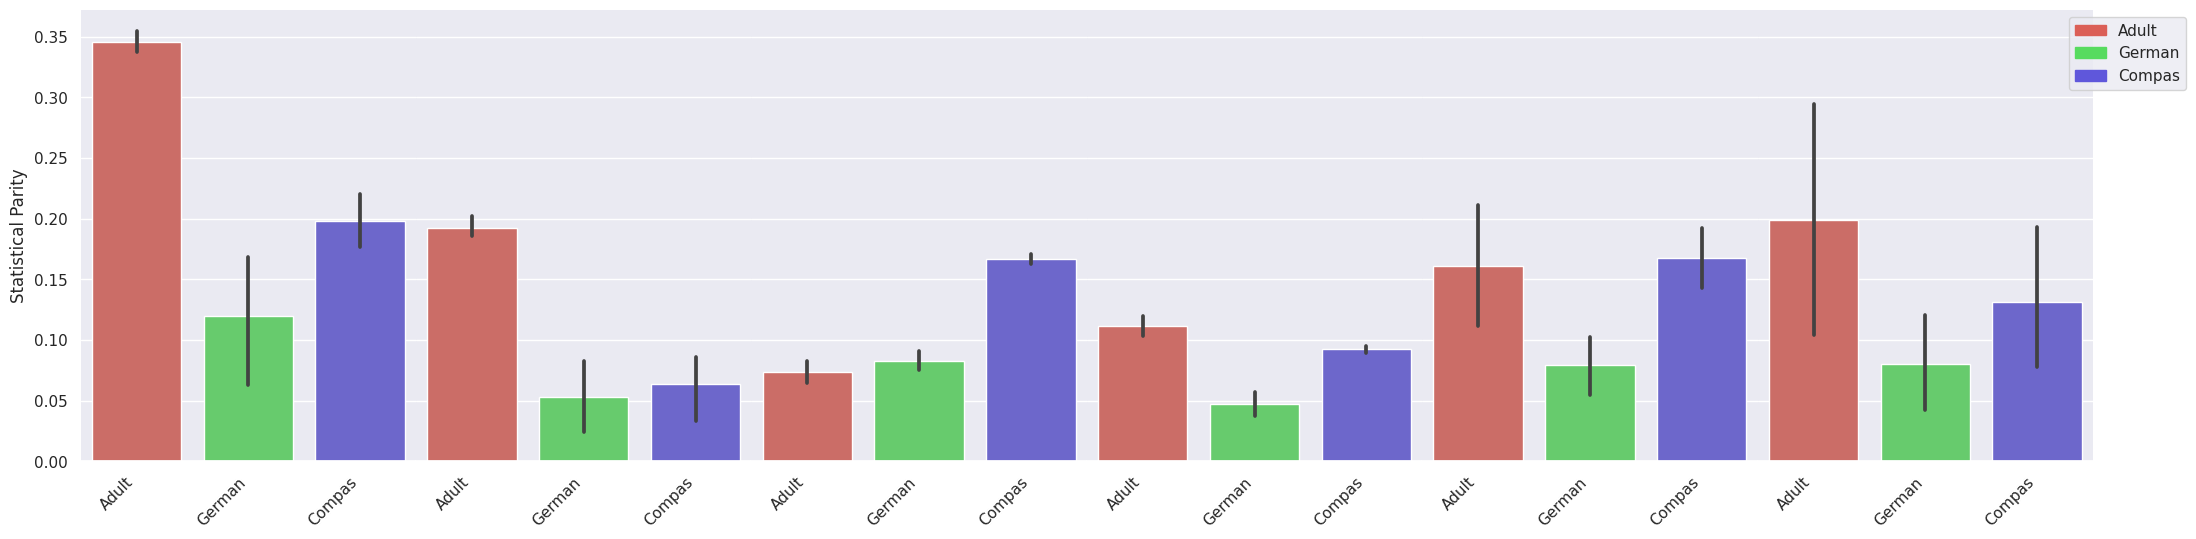

In [126]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seu código atual...

# Obter categorias únicas de "Data_Name"
data_names = df["Data_Name"].unique()

# Definir cores para as categorias de "Data_Name"
colors = sns.color_palette("hls", len(data_names))

# Ajustar largura e espaçamento das barras
plt.figure(figsize=(9, 8))
g = sns.catplot(
    data=df, x="Data_Name", y="Statistical Parity", col="Method",
    kind="bar", height=6, aspect=0.6, palette=colors
)
g.despine(left=True)
g.set_xticklabels(rotation=45, horizontalalignment='right')
g.set_titles("")
g.set_xlabels("")
g.set_ylabels("Statistical Parity")

# Adicionar legenda para as cores das categorias de "Data_Name"

plt.subplots_adjust(wspace=0, bottom=0.18, left=0.06)
plt.show()
